# Data Analysis Project: Bike Sharing
- **Nama:** Muhammad Sahrul
- **Email:** m.sahrul59@gmail.com
- **ID Dicoding:** sahrul57

## Project Introduction

### Dataset Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.


Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### Attribute Information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index </br>
dteday : date </br>
season : season (1:springer, 2:summer, 3:fall, 4:winter) </br>
yr : year (0: 2011, 1:2012) </br>
mnth : month ( 1 to 12) </br>
hr : hour (0 to 23) </br>
holiday : weather day is holiday or not (extracted from [Web Link]) </br>
weekday : day of the week </br>
workingday : if day is neither weekend nor holiday is 1, otherwise is 0. </br>
weathersit : </br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy </br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist </br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + * * Scattered clouds </br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </br>
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) </br>
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) </br>
hum: Normalized humidity. The values are divided to 100 (max) </br>
windspeed: Normalized wind speed. The values are divided to 67 (max) </br>
casual: count of casual users </br>
registered: count of registered users </br>
cnt: count of total rental bikes including both casual and registered </br>

## Defining the Business Question

- How is the trend in the number of bike-sharing rides in recent years?
- What is the usage pattern of bike-sharing rides based on time of day?
- What season has the highest bike-sharing rides?
- What is the usage pattern of bike-sharing rides based on day of the week?
- Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?
- Does weather affect bikeshare usage?

## Import Packages/Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [2]:
hourlysharing_df = pd.read_csv("https://raw.githubusercontent.com/muhammadsahrul59/Bike-Sharing-Dashboard/main/data/hour.csv")
hourlysharing_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
dailysharing_df = pd.read_csv("https://raw.githubusercontent.com/muhammadsahrul59/Bike-Sharing-Dashboard/main/data/day.csv")
dailysharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
hourlysharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
dailysharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Assessing Data

#### Assessing table `dailysharing_df`

In [6]:
dailysharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
dailysharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Number of duplications: ", dailysharing_df.duplicated().sum())

Number of duplications:  0


In [9]:
dailysharing_df.describe(include="all")

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

In [10]:
print(dailysharing_df.shape)

(731, 16)


#### Assessing table `hourlysharing_df`

In [11]:
hourlysharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hourlysharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Number of duplications: ", hourlysharing_df.duplicated().sum())

Number of duplications:  0


In [14]:
hourlysharing_df.describe(include="all")

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

In [15]:
hourlysharing_df.value_counts()

instant  dteday      season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  atemp   hum   windspeed  casual  registered  cnt
1        2011-01-01  1       0   1     0   0        6        0           1           0.24  0.2879  0.81  0.0000     3       13          16     1
11592    2012-05-03  2       1   5     4   0        4        1           2           0.46  0.4545  0.88  0.2537     0       2           2      1
11578    2012-05-02  2       1   5     14  0        3        1           1           0.62  0.6061  0.69  0.0896     51      189         240    1
11579    2012-05-02  2       1   5     15  0        3        1           1           0.64  0.6061  0.65  0.1940     52      204         256    1
11580    2012-05-02  2       1   5     16  0        3        1           1           0.64  0.6061  0.65  0.1642     54      313         367    1
                                                                                                                                       

In [16]:
print(hourlysharing_df.shape)

(17379, 17)


- In the **daily_df** & **hourly_df** tables, there are no problems with Missing Value, Duplicate Data, and Inaccurate value. However, there is a problem with the data type that we will change in the Data Cleaning stage.

- As explained in the dataset dictionary, the variables `temp`, `atemp`, `hum` and `windspeed` are normalized. To gain better understanding of the real life condition, we will corrected these values to before normalized.

### Assesing Data Summary

- Convert `dteday` variable to date data type
- The `season`, `weekday`, and `mnth` variables are represented in integer, we will change them into their respective string values.
- The `yr` variable are represented as 0 for year 2011 and 1 for year 2012. We will change them to their respective values.
- As explained in the dataset dictionary, the variables `temp`, `atemp`, `hum` and `windspeed` are normalized. To gain better understanding of the real life condition, we will corrected these values to before normalized.

### Cleaning Data

#### Convert `dteday` data type

In [17]:
hourlysharing_df['dteday'] = pd.to_datetime(hourlysharing_df['dteday'])

In [18]:
hourlysharing_df.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#### Correct the values of `season`, `weekday` and `month` variables

In [19]:
hourlysharing_df['weekday'] = hourlysharing_df['dteday'].dt.day_name()

In [20]:
hourlysharing_df.head(3)

instant     dteday  season  yr  mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0  Saturday           0   
1        2 2011-01-01       1   0     1   1        0  Saturday           0   
2        3 2011-01-01       1   0     1   2        0  Saturday           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

In [21]:
hourlysharing_df['mnth'] = hourlysharing_df['dteday'].dt.month_name()

In [22]:
hourlysharing_df.head(3)

instant     dteday  season  yr     mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01       1   0  January   0        0  Saturday           0   
1        2 2011-01-01       1   0  January   1        0  Saturday           0   
2        3 2011-01-01       1   0  January   2        0  Saturday           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

In [23]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hourlysharing_df['season']:
    season = find_season(season)
    season_list.append(season)

hourlysharing_df['season'] = season_list

In [24]:
hourlysharing_df.head(3)

instant     dteday  season  yr     mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01  Winter   0  January   0        0  Saturday           0   
1        2 2011-01-01  Winter   0  January   1        0  Saturday           0   
2        3 2011-01-01  Winter   0  January   2        0  Saturday           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

#### Correct the values of `yr` variable

In [25]:
hourlysharing_df['yr'] = hourlysharing_df['dteday'].dt.year

In [26]:
hourlysharing_df.head(3)

instant     dteday  season    yr     mnth  hr  holiday   weekday  \
0        1 2011-01-01  Winter  2011  January   0        0  Saturday   
1        2 2011-01-01  Winter  2011  January   1        0  Saturday   
2        3 2011-01-01  Winter  2011  January   2        0  Saturday   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0           1  0.24  0.2879  0.81        0.0       3          13   
1           0           1  0.22  0.2727  0.80        0.0       8          32   
2           0           1  0.22  0.2727  0.80        0.0       5          27   

   cnt  
0   16  
1   40  
2   32

#### Correct the values of `temp`, `atemp`, `hum`, and `windspeed` to before normalized

In [27]:
hourlysharing_df['temp'] = hourlysharing_df['temp']*41
hourlysharing_df['atemp'] = hourlysharing_df['atemp']*50
hourlysharing_df['hum'] = hourlysharing_df['hum']*100
hourlysharing_df['windspeed'] = hourlysharing_df['windspeed']*67

In [28]:
hourlysharing_df.head()

instant     dteday  season    yr     mnth  hr  holiday   weekday  \
0        1 2011-01-01  Winter  2011  January   0        0  Saturday   
1        2 2011-01-01  Winter  2011  January   1        0  Saturday   
2        3 2011-01-01  Winter  2011  January   2        0  Saturday   
3        4 2011-01-01  Winter  2011  January   3        0  Saturday   
4        5 2011-01-01  Winter  2011  January   4        0  Saturday   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0           1  9.84  14.395  81.0        0.0       3          13   
1           0           1  9.02  13.635  80.0        0.0       8          32   
2           0           1  9.02  13.635  80.0        0.0       5          27   
3           0           1  9.84  14.395  75.0        0.0       3          10   
4           0           1  9.84  14.395  75.0        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

#### Save the cleaned dataset

In [29]:
hourlysharing_df.to_csv("cleaned_bikeshare.csv", index=False)

## Exploratory Data Analysis (EDA)

In [30]:
hourlysharing_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int32
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

#### Univariate Analysis

##### Histogram

In [31]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = hourlysharing_df[float_vars]

df_float.describe()

temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean      20.376474     23.788755     62.722884     12.736540
std        7.894801      8.592511     19.292983      8.196795
min        0.820000      0.000000      0.000000      0.000000
25%       13.940000     16.665000     48.000000      7.001500
50%       20.500000     24.240000     63.000000     12.998000
75%       27.060000     31.060000     78.000000     16.997900
max       41.000000     50.000000    100.000000     56.996900

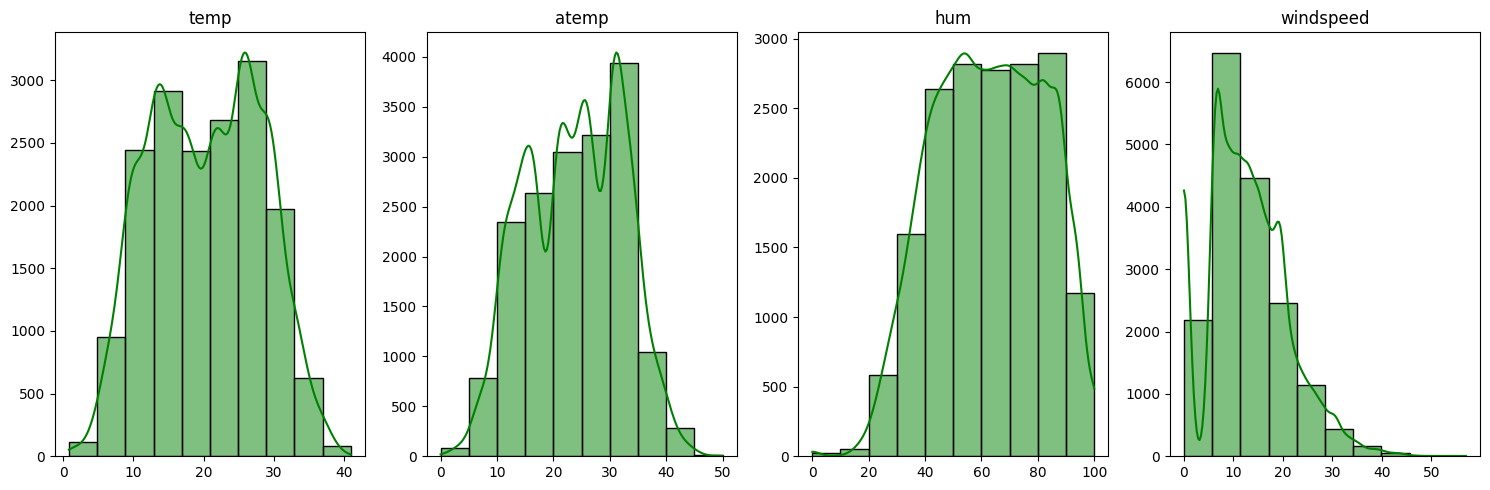

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='green')

    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

##### Boxplot

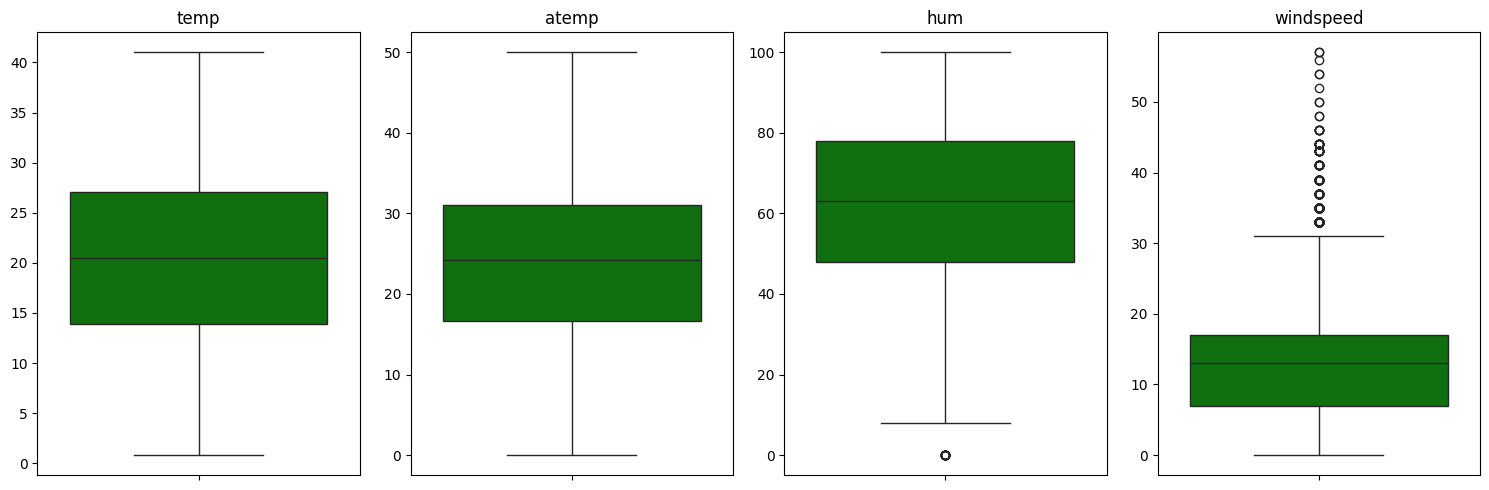

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='green')

    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

##### Histogram & Boxplot of bike-share users

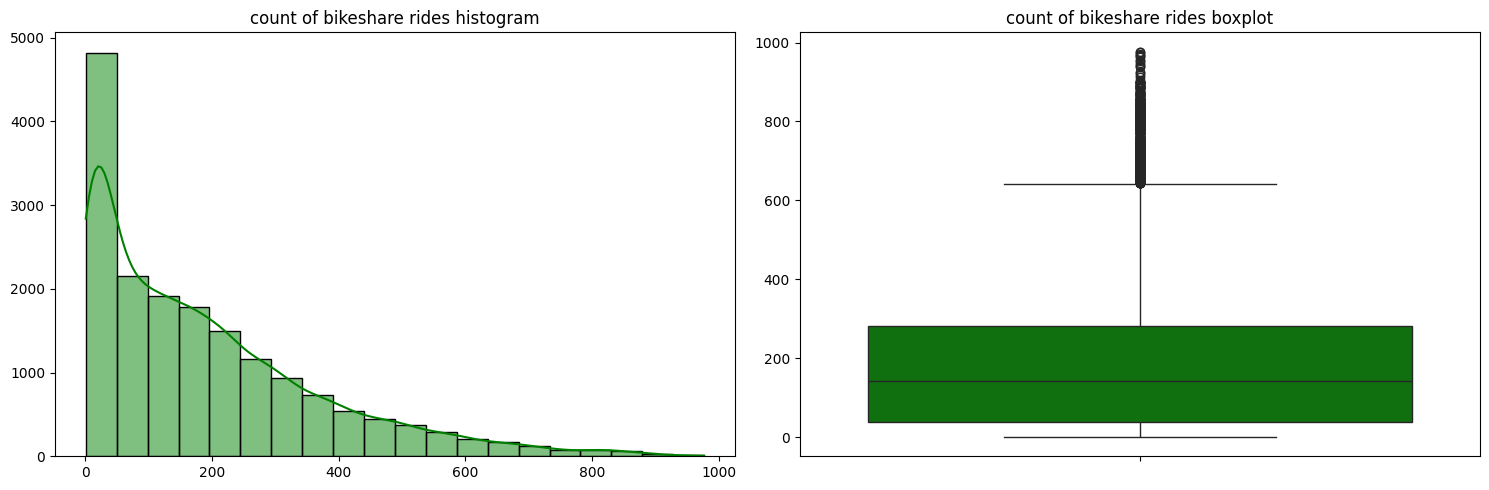

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(hourlysharing_df['cnt'], kde=True, bins=20, ax = axs[0], color='green')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=hourlysharing_df['cnt'], ax = axs[1], color='green')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")

plt.tight_layout()

plt.show()

- Histogram for `temp`, `atemp`, and `hum` shows normal distribution, while for `windspeed` is right-skewed. We also can deduce this by observing the value of mean and median in each variable.
- Boxplot for `temp`, `atemp`, and `hum` shows no outliers, while for `windspeed` outliers were observed.
- Histogram for count if bikeshare rides is right-skewed. There are also outliers observed in the boxplot.
- While there are outliers in `windspeed` variable, we see that the maximum value of 57 mph, and it is not an anomaly and may happen in real life. So we won't remove the outliers in this case.
- Similar to `windspeed`, the outliers won't be removed as it maybe possible there are days with extremely high count of rides.

#### Multivariate Analysis

##### Count the number of casual and registered users

<ipython-input-35-877c8784e14a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["green", "lightgreen"])


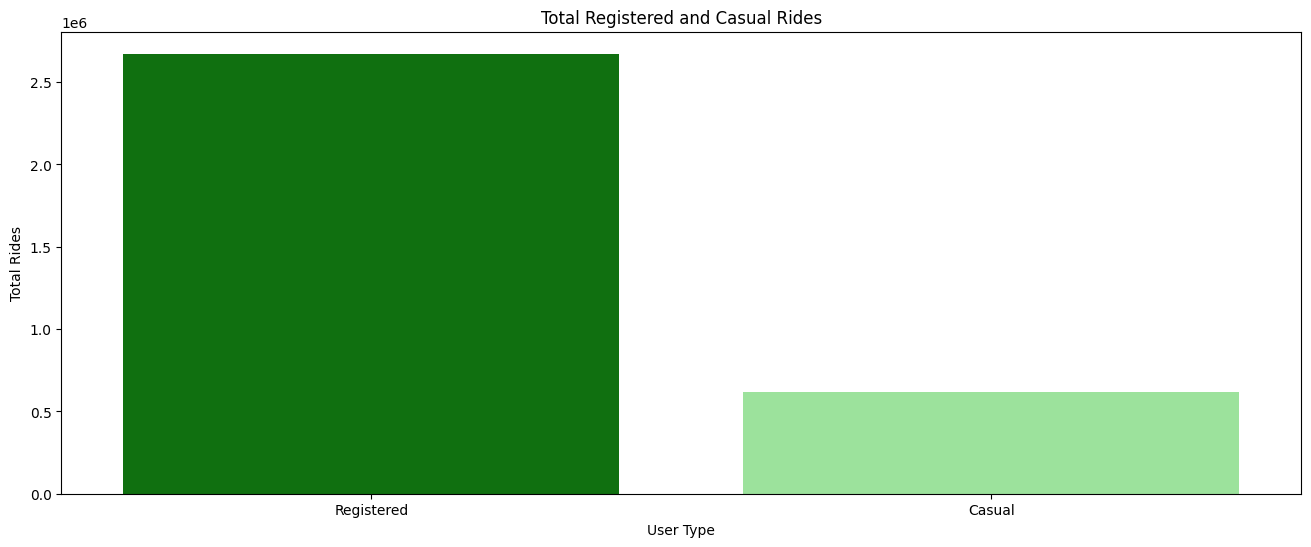

Count of registered users: 2672662
Count of casual users: 620017


In [35]:
registered_sum = hourlysharing_df['registered'].sum()
casual_sum = hourlysharing_df['casual'].sum()

plt.figure(figsize=(16,6))

sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["green", "lightgreen"])

plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

The number of registered bikeshare users are higher than higher than casual users

##### Time series plot of bikeshare users

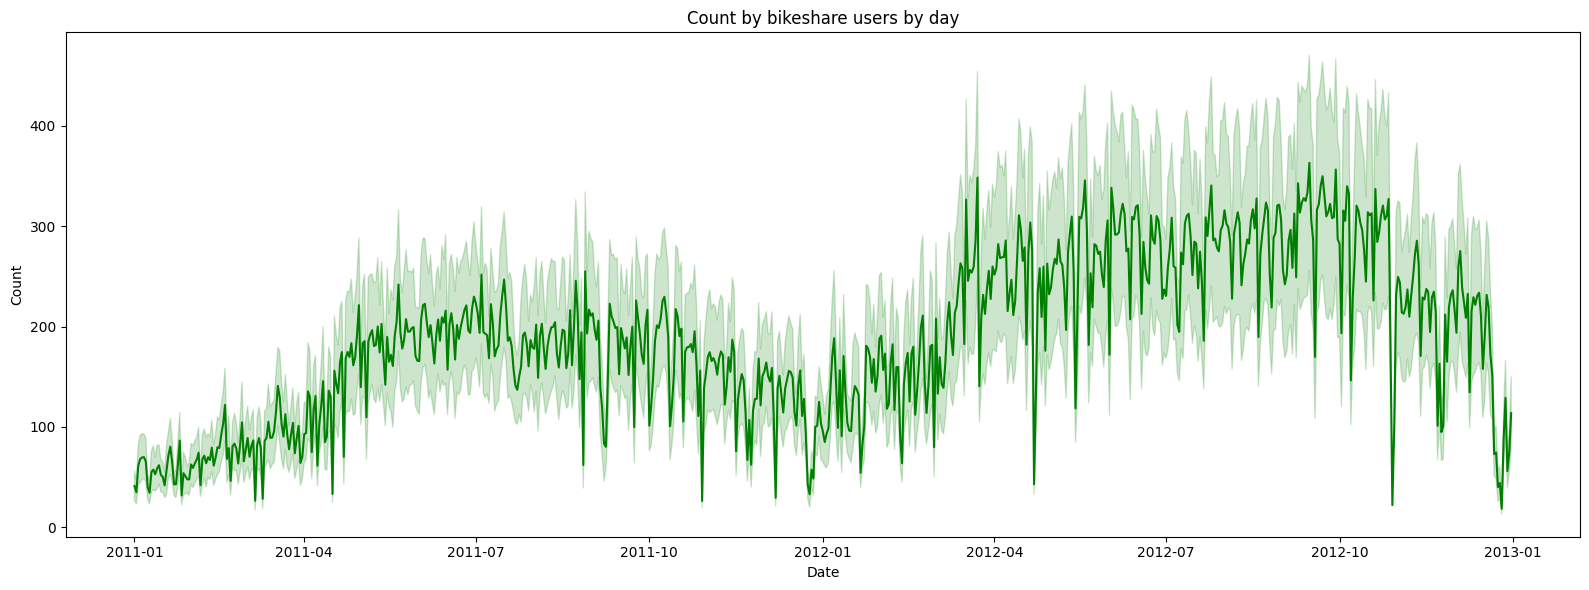

In [36]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=hourlysharing_df, color='green')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

plt.tight_layout()
plt.show()

- The count of rides starts low in the beginning of each year, then starts to increase in the middle of the year, then decreased nearing the end of each year.
- The number of users seems higher in 2012 than in 2011.

##### Boxplot of bikeshare users by type

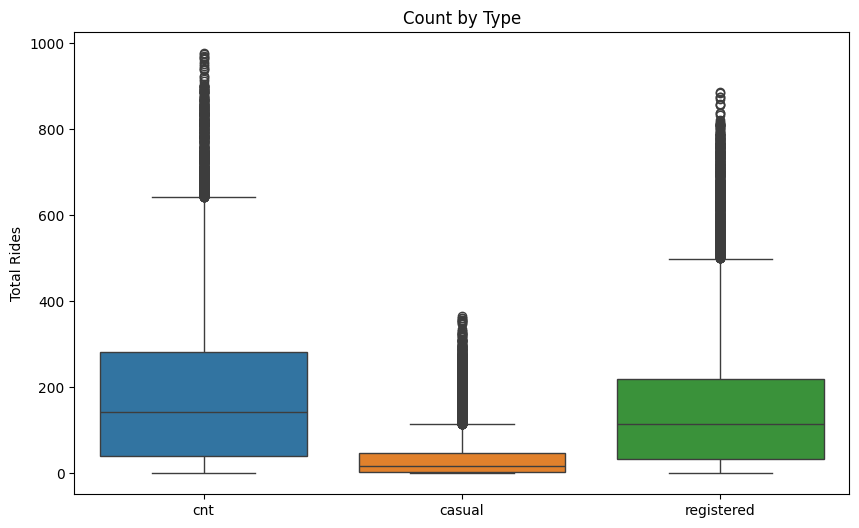

In [37]:
plt.figure(figsize=(10,6))

sns.boxplot(data=hourlysharing_df[['cnt', 'casual', 'registered']])

plt.ylabel("Total Rides")
plt.title("Count by Type")

plt.show()

The count of bikeshare rides vary by membership; count of registered bikeshare rides are higher than casual

##### Boxplot of bikeshare users by year

<ipython-input-38-5ef8b6e0271f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


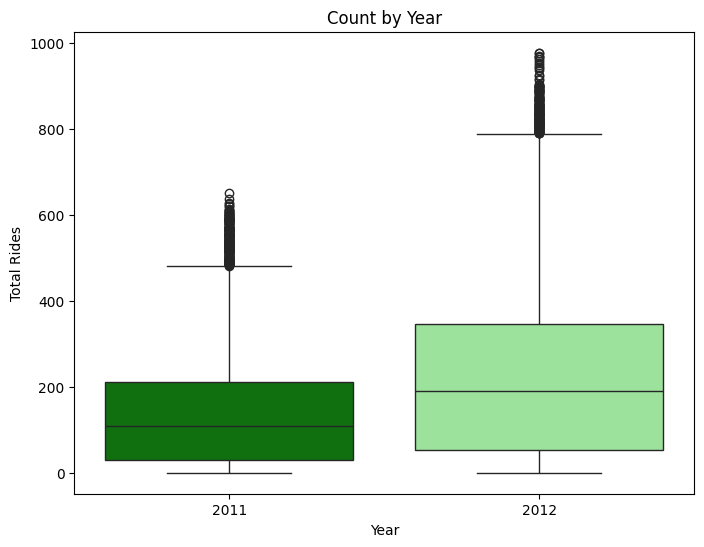

In [38]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x="yr",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

plt.show()

As previously seen in the line chart, and confirmed by this boxplot, the number of bikeshare rides in 2012 are higher than in 2011.

##### Boxplots of bikeshare users by season

<ipython-input-39-9cd9738695e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-39-9cd9738695e3>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


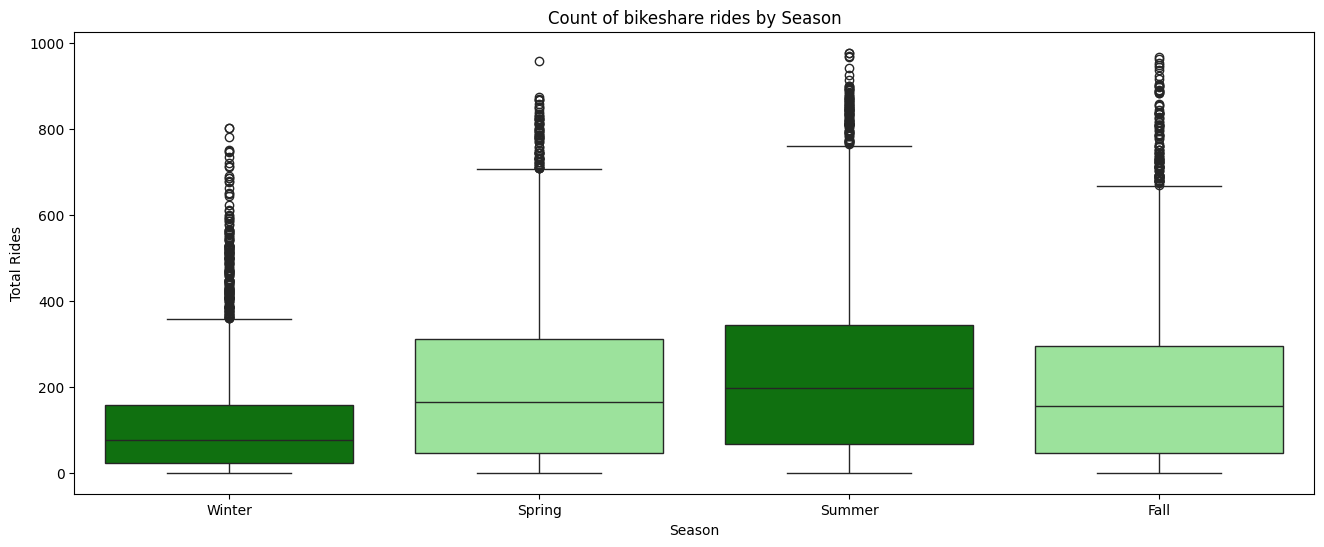

In [39]:
plt.figure(figsize=(16,6))

sns.boxplot(
    x="season",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

The count of bikeshare rides are the lowest in winter, and the highest in summer.

##### Boxplots of bikeshare users by month

<ipython-input-40-0bda371ed133>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-40-0bda371ed133>:3: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


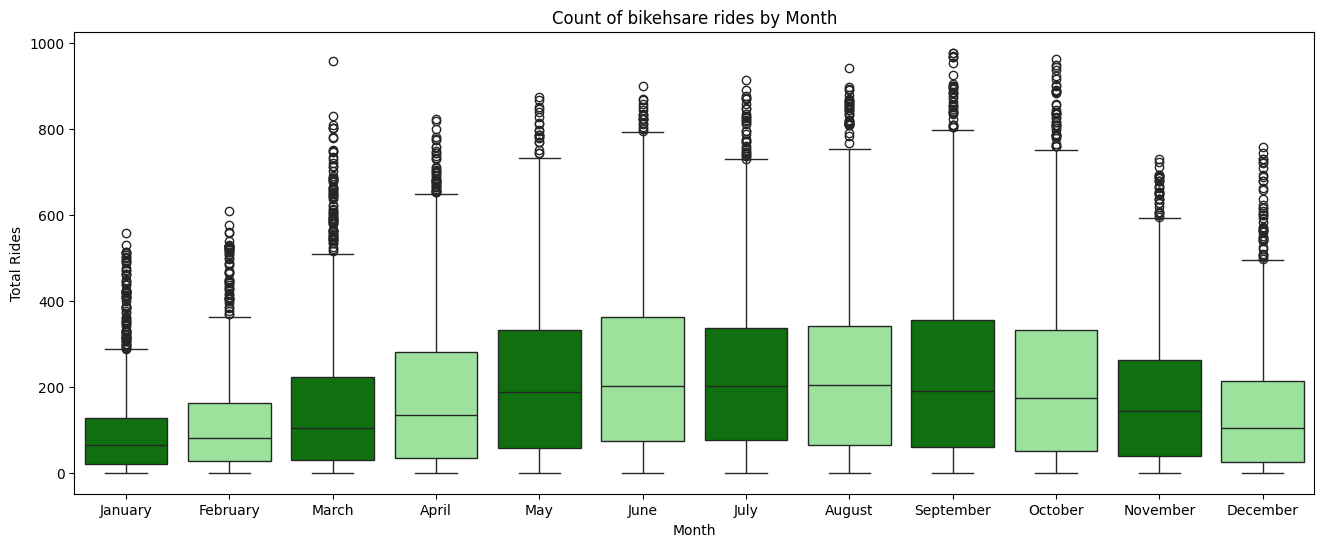

In [40]:
plt.figure(figsize=(16,6))

sns.boxplot(
    x="mnth",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")

plt.show()

As previously seen in the line chart, and confirmed by this boxplot, the number of bikeshare rides tend to increase in the middle of the year, and decreased in the beginning the year (January and February) and in the end of the year (November and December)

##### Boxplots of bikeshare users by weekday

In [41]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-42-4becab52f601>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-42-4becab52f601>:3: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


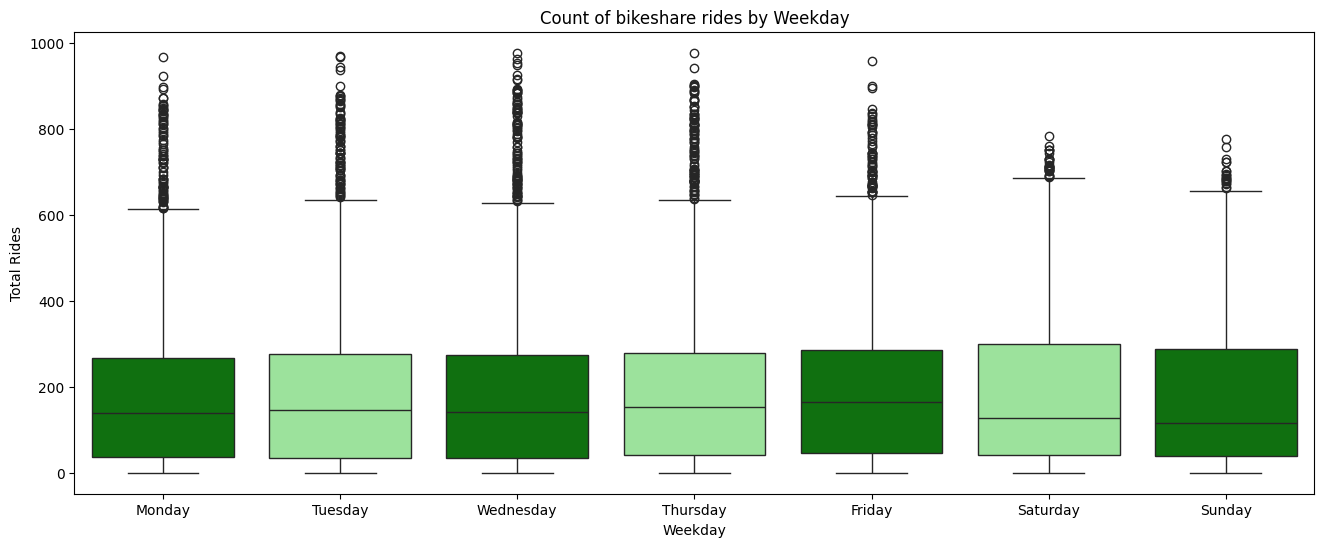

In [42]:
plt.figure(figsize=(16,6))

sns.boxplot(
    x="weekday",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"],
    order=day_order
)

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- The boxplots shows quite similar number of rides in every weekday
- There are less outliers in Saturday and Sunday compared to other days

##### Boxplots of bikeshare users by hour

<ipython-input-43-206a55ddf930>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-43-206a55ddf930>:3: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


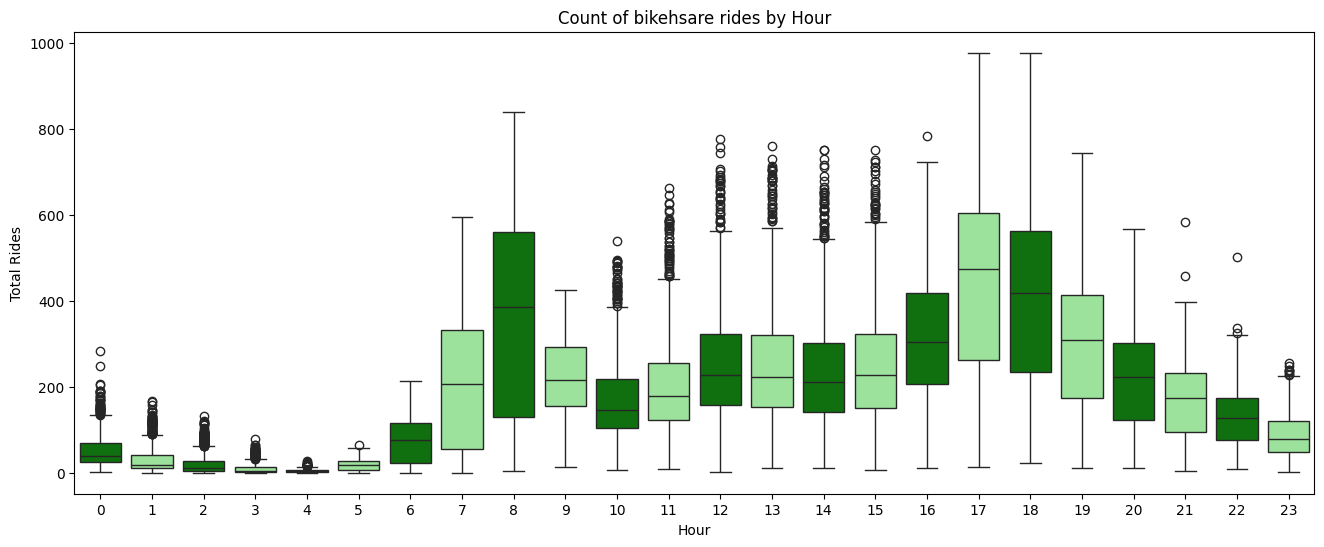

In [43]:
plt.figure(figsize=(16,6))

sns.boxplot(
    x="hr",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

plt.show()

- From midnight to dawn, the number of bikeshare rides are the lowest
- It begin to increase in the morning, and reach its peak in 8.00
- It begin to decrease again during the day, but starting in 16.00 it begin to increase again and reach its peak again in 17.00
- After that the number of bikeshare rides decreased throughout the night

##### Boxplots of bikeshare users by holiday

<ipython-input-44-ad16b5eb0c5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


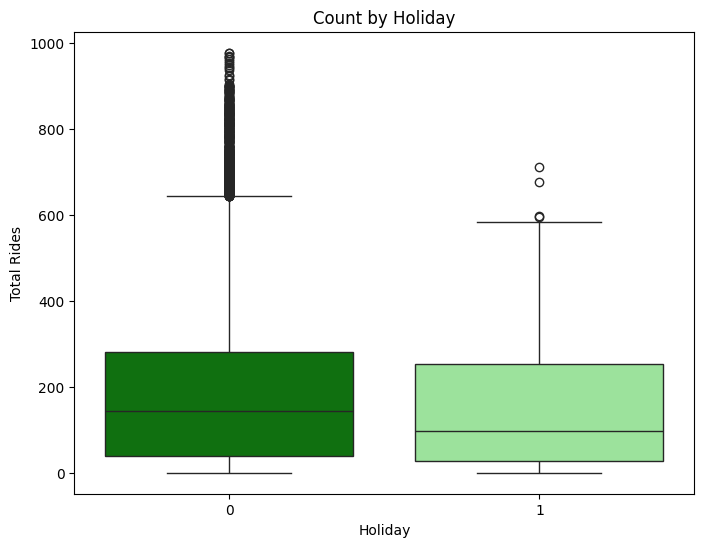

Count of bikeshare users based on holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


In [44]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x="holiday",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count by Holiday")

plt.show()

print('Count of bikeshare users based on holiday:')
print(hourlysharing_df['holiday'].value_counts())

Count of bikeshare rides on non-holiday are higher than on holiday, though it's understandable since day of holiday are less than day of non-holiday

##### Boxplots of bikeshare users by workingday

<ipython-input-45-c414e5f9caf1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


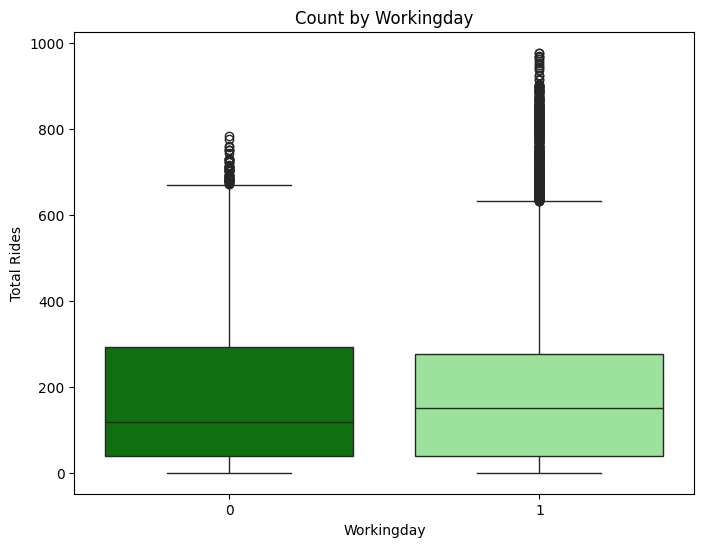

Count of bikeshare users based on working day:
workingday
1    11865
0     5514
Name: count, dtype: int64


In [45]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x="workingday",
    y="cnt",
    data=hourlysharing_df,
    palette=["green", "lightgreen"]
)

plt.xlabel("Workingday")
plt.ylabel("Total Rides")
plt.title("Count by Workingday")

plt.show()

print('Count of bikeshare users based on working day:')
print(hourlysharing_df['workingday'].value_counts())

Count of bikeshare rides on working day are higher than on holiday, though it's understandable since day of holiday and weekends are less than day of working day

##### Scatterplot of temperature, feeling temperature, humidity. and windspeed vs. count of bikeshare users

In [46]:
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = hourlysharing_df[scatter_vars]

df_scatter.head(3)

cnt  temp   atemp   hum  windspeed
0   16  9.84  14.395  81.0        0.0
1   40  9.02  13.635  80.0        0.0
2   32  9.02  13.635  80.0        0.0

In [47]:
hourlysharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

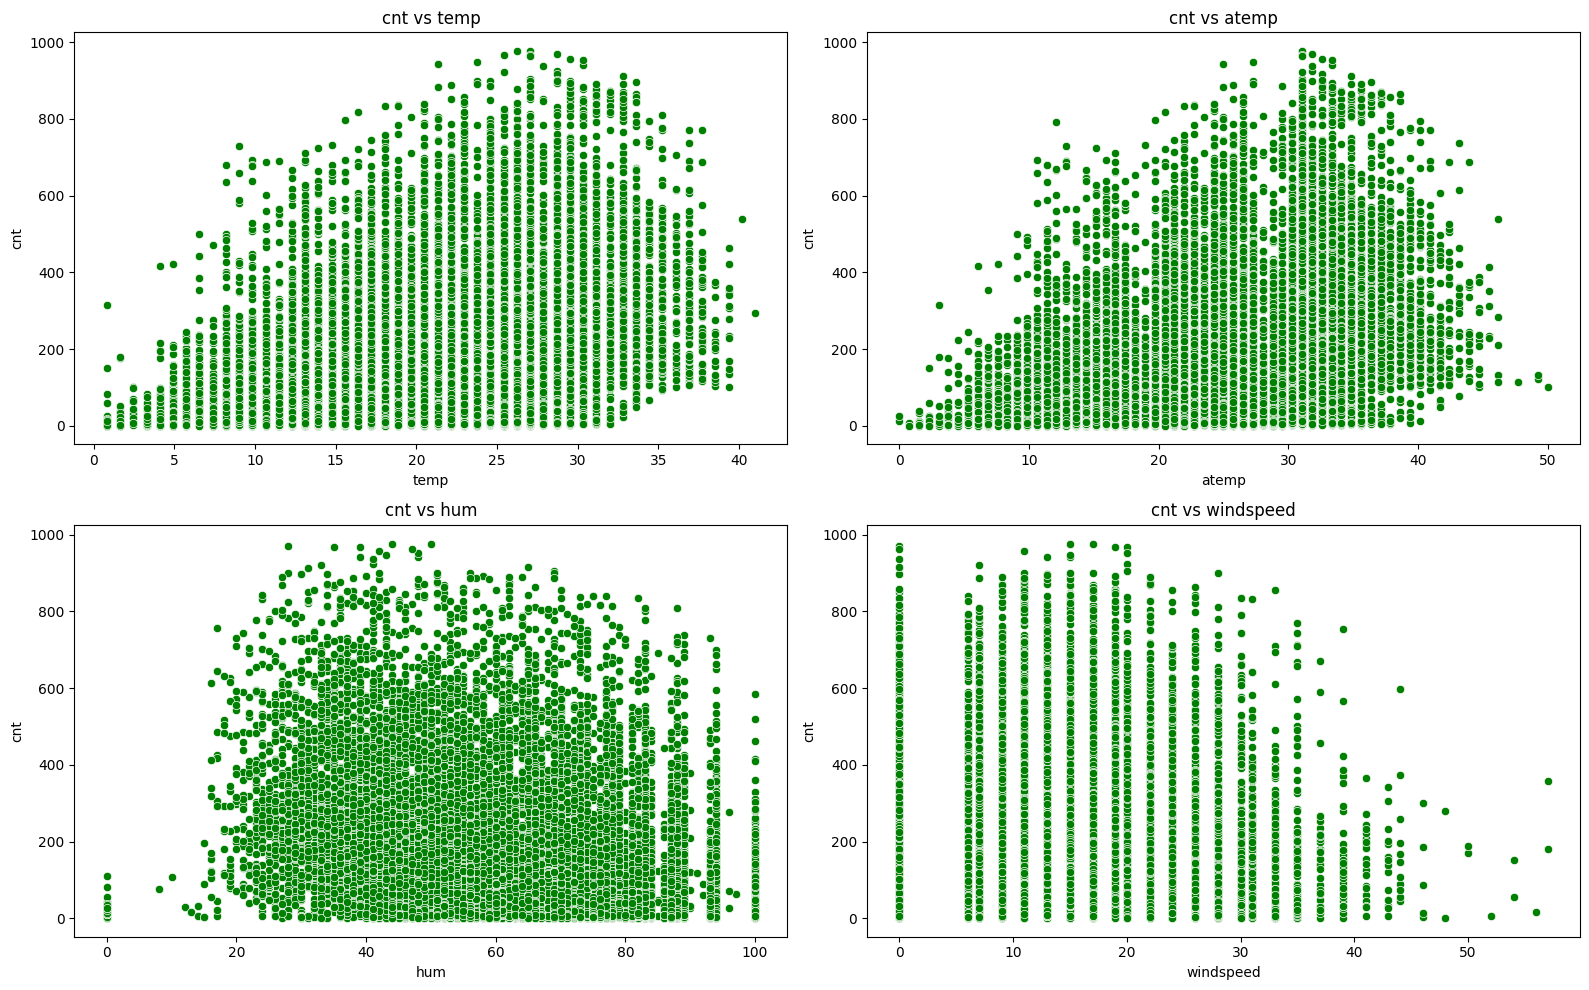

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i, col in enumerate(hourlysharing_df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=hourlysharing_df, ax=axs[i // 2, i % 2], color='green')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

plt.tight_layout()

plt.show()

- The scatter plot of cnt vs. temp and cnt vs. atemp shows that the count of bikeshare rides increased as the temperature increase. It seems like there is a correlation between temperature and count of bikeshare rides.
- The scatter plot of hum vs. cnt shows no correlation.
- The scatter plot of cnt vs. windspeed shows that the count of bikeshare rides seems to decrease as the windspeed increase.

### **Correlation and Correlation Heat Map**

In [49]:
hourlysharing_df.corr(numeric_only=True)

instant        yr        hr   holiday  workingday  weathersit  \
instant     1.000000  0.866014 -0.004775  0.014723   -0.003416   -0.014198   
yr          0.866014  1.000000 -0.003867  0.006692   -0.002196   -0.019157   
hr         -0.004775 -0.003867  1.000000  0.000479    0.002285   -0.020203   
holiday     0.014723  0.006692  0.000479  1.000000   -0.252471   -0.017036   
workingday -0.003416 -0.002196  0.002285 -0.252471    1.000000    0.044672   
weathersit -0.014198 -0.019157 -0.020203 -0.017036    0.044672    1.000000   
temp        0.136178  0.040913  0.137603 -0.027340    0.055390   -0.102640   
atemp       0.137615  0.039222  0.133750 -0.030973    0.054667   -0.105563   
hum         0.009577 -0.083546 -0.276498 -0.010588    0.015688    0.418130   
windspeed  -0.074505 -0.008740  0.137252  0.003988   -0.011830    0.026226   
casual      0.158295  0.142779  0.301202  0.031564   -0.300942   -0.152628   
registered  0.282046  0.253684  0.374141 -0.047345    0.134326   -0.120966   
cnt         0.278379  0.250495  0.394071 -0.030927    0.030284   -0.142426   

                temp     atemp       hum  windspeed    casual  registered  \
instant     0.136178  0.137615  0.009577  -0.074505  0.158295    0.282046   
yr          0.040913  0.039222 -0.083546  -0.008740  0.142779    0.253684   
hr          0.137603  0.133750 -0.276498   0.137252  0.301202    0.374141   
holiday    -0.027340 -0.030973 -0.010588   0.003988  0.031564   -0.047345   
workingday  0.055390  0.054667  0.015688  -0.011830 -0.300942    0.134326   
weathersit -0.102640 -0.105563  0.418130   0.026226 -0.152628   -0.120966   
temp        1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361   
atemp       0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559   
hum        -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933   
windspeed  -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321   
casual      0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618   
registered  0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000   
cnt         0.404772  0.400929 -0.322911   0.093234  0.694564    0.972151   

                 cnt  
instant     0.278379  
yr          0.250495  
hr          0.394071  
holiday    -0.030927  
workingday  0.030284  
weathersit -0.142426  
temp        0.404772  
atemp       0.400929  
hum        -0.322911  
windspeed   0.093234  
casual      0.694564  
registered  0.972151  
cnt         1.000000

<Axes: >

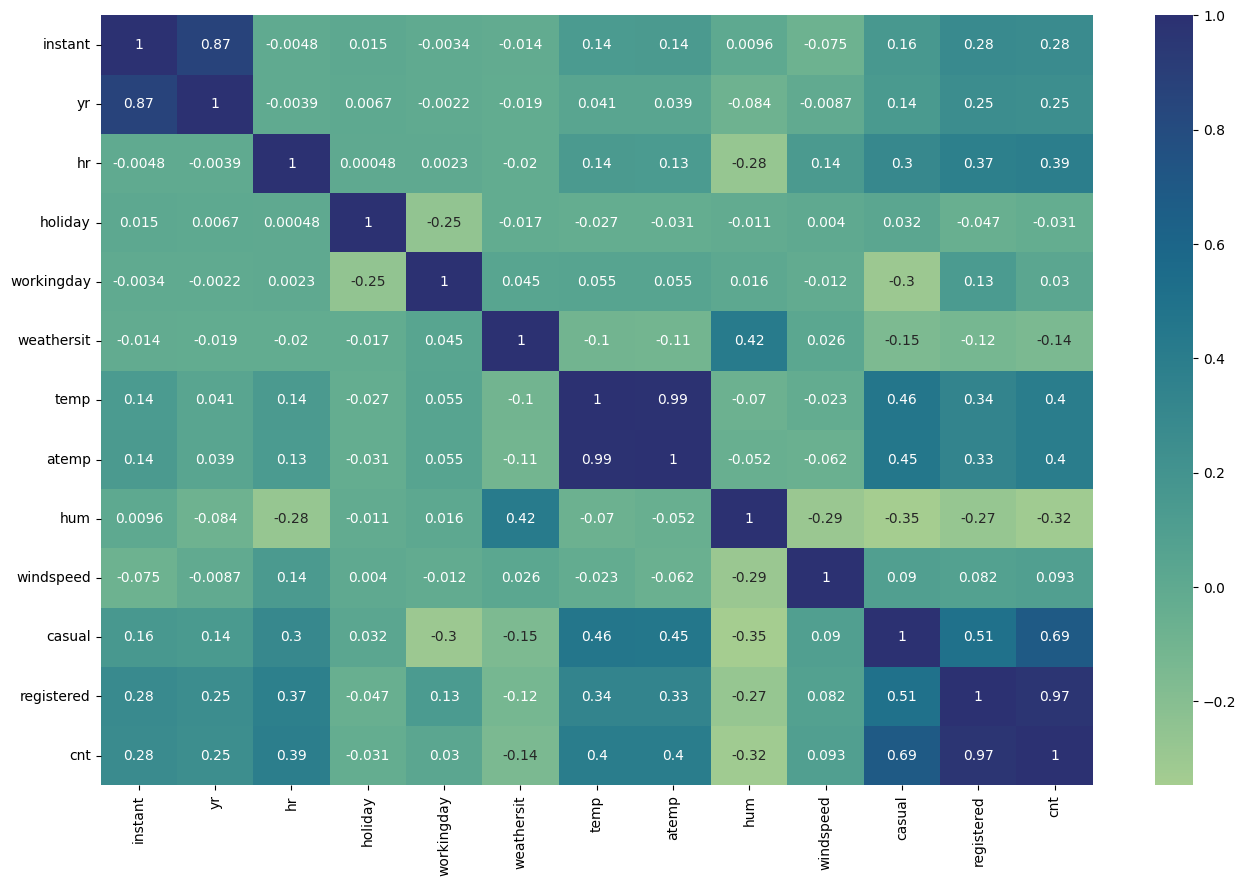

In [50]:
plt.figure(figsize=(16, 10))
sns.heatmap(hourlysharing_df.corr(numeric_only=True), annot=True, cmap="crest")

- There is strong correlation between casual and registered variables vs. cnt, though this is expected since the increase in casual and registered users will affected cnt (total rides) directly.
- There are moderate correlation between hr, temp and atemp vs count of bikeshare rides.

## **Visualization & Explanatory Analysis**

In this chapter, we will answer the questions defined above.

- How is the trend in the number of bike-sharing rides in recent years?
- What is the usage pattern of bike-sharing rides based on time of day?
- What season has the highest bike-sharing rides?
- What is the usage pattern of bike-sharing rides based on day of the week?
- Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?
- Does weather affect bikeshare usage?

### **What is the trend in the number of bike-sharing rides in recent years?**

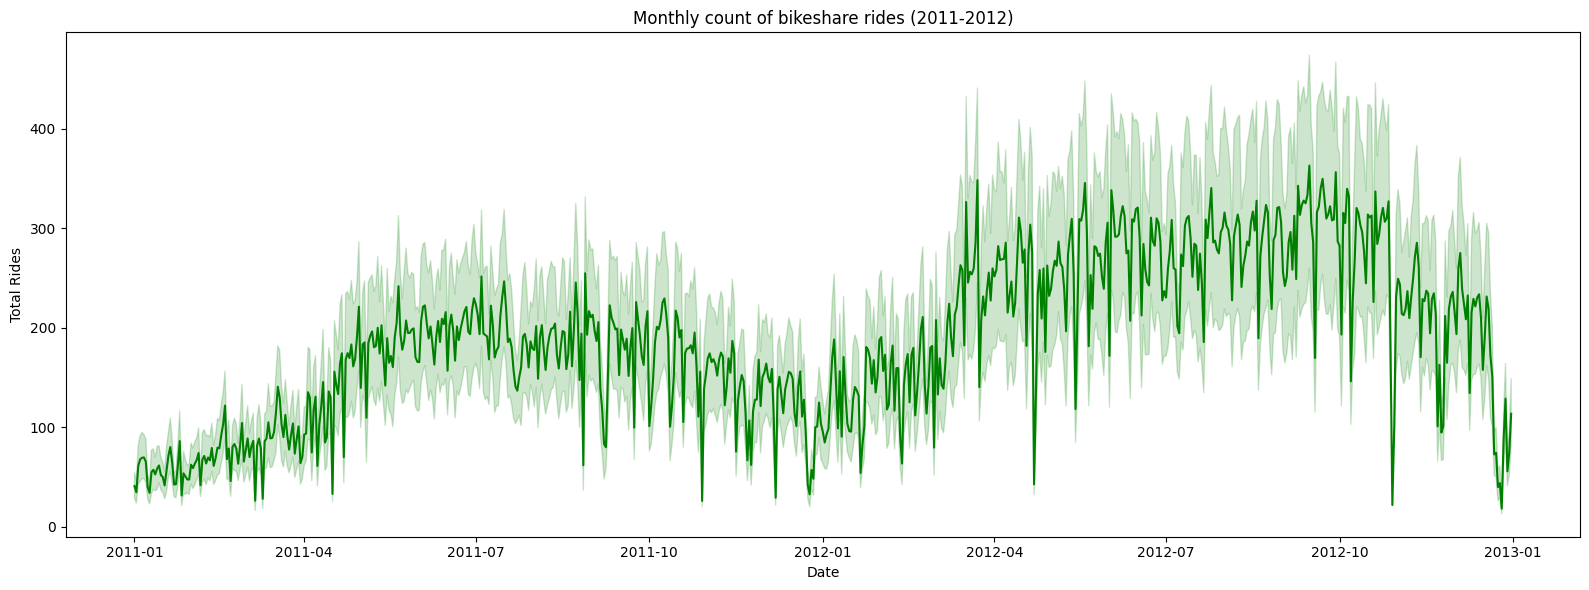

In [51]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=hourlysharing_df, color='green')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

plt.tight_layout()
plt.show()

To make it more interpretable, let's pivot it to monthly figure. Using `resample`, we will aggregate the time-series based data (from daily to monthly)

In [52]:
monthly_users_df = hourlysharing_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

casual  registered    cnt
dteday                               
2011-01-31    3073       35116  38189
2011-02-28    6242       41973  48215
2011-03-31   12826       51219  64045

In [53]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [54]:
monthly_users_df.head(3)

casual  registered    cnt
dteday                           
Jan-11    3073       35116  38189
Feb-11    6242       41973  48215
Mar-11   12826       51219  64045

In [55]:
monthly_users_df = monthly_users_df.reset_index()

In [56]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [57]:
monthly_users_df.head()

yearmonth  casual  registered     cnt
0    Jan-11    3073       35116   38189
1    Feb-11    6242       41973   48215
2    Mar-11   12826       51219   64045
3    Apr-11   22346       72524   94870
4    May-11   31050      104771  135821

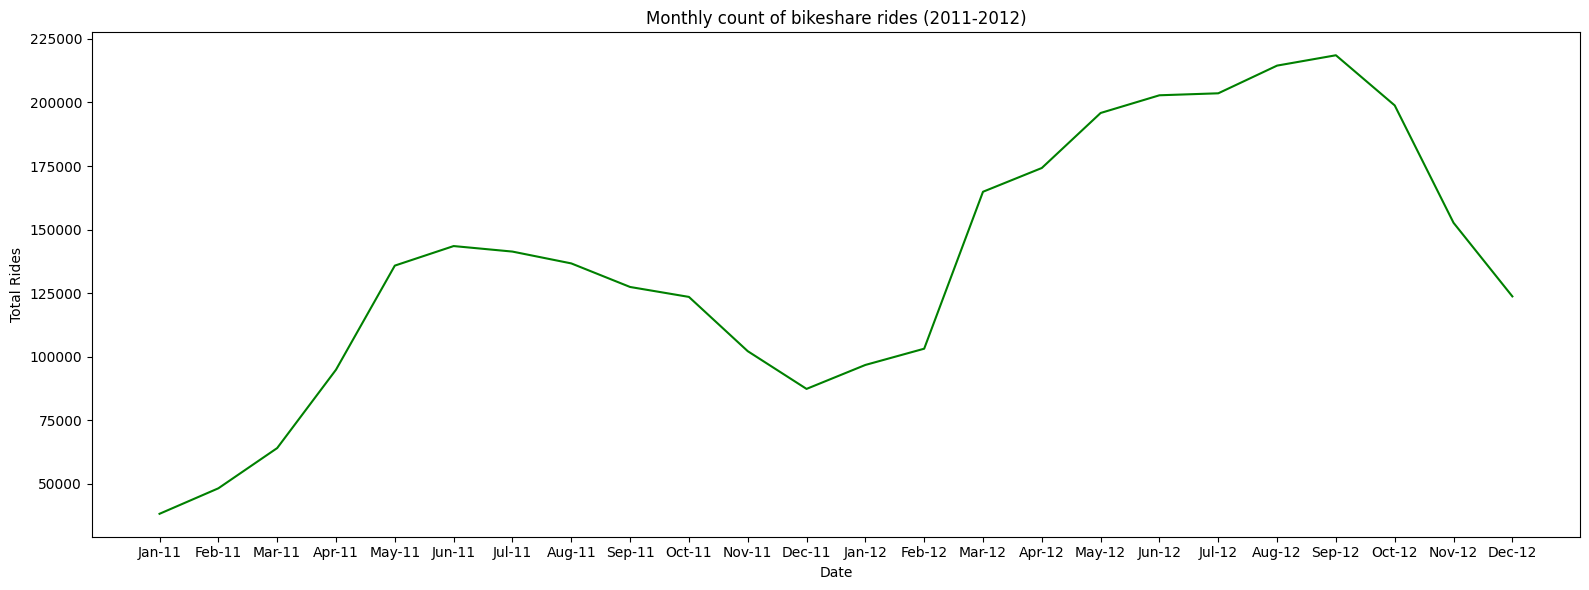

In [58]:
plt.figure(figsize=(16,6))

sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='green')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

plt.tight_layout()
plt.show()

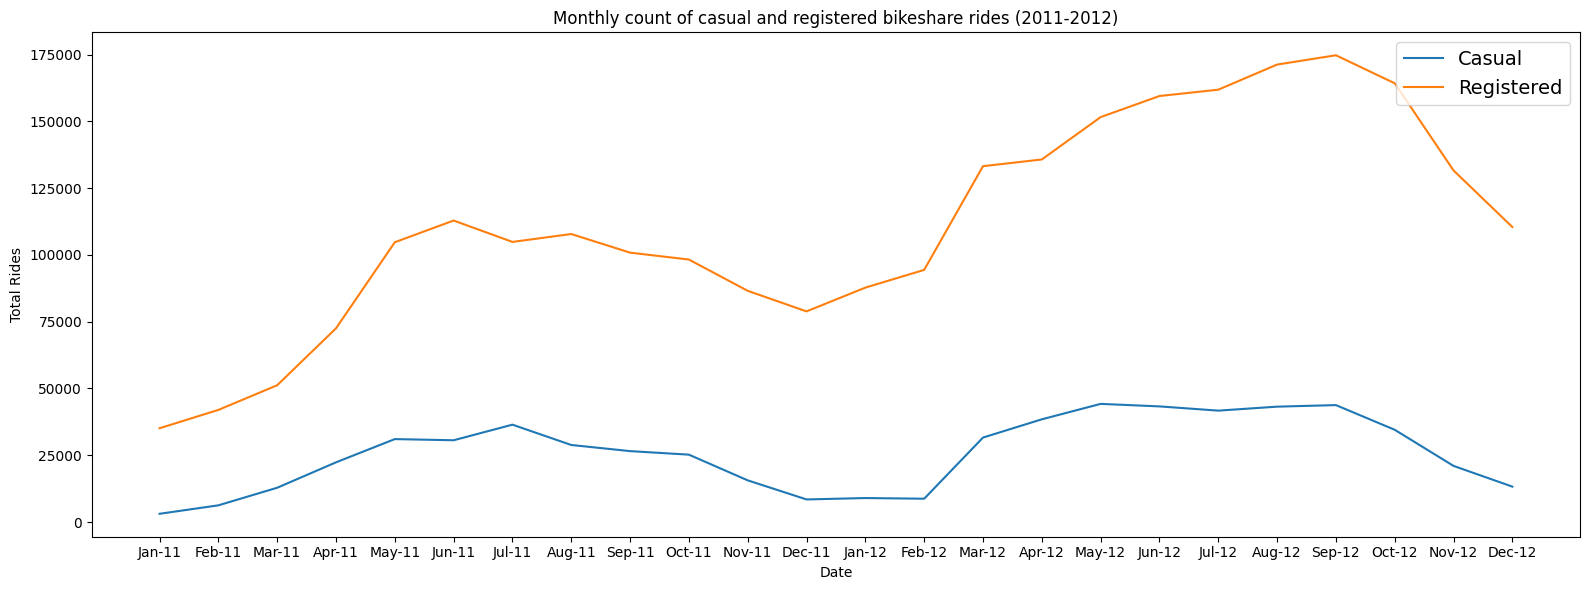

In [59]:
plt.figure(figsize=(16,6))

sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. The count of bikeshare rides in 2012 are higher than in 2011.
2. We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4.
3. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.

### **What is the usage pattern of bike-sharing rides based on time of day?**

In [60]:
hourly_users_df = hourlysharing_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

casual  registered    cnt
hr                           
0     7375       31755  39130
1     4709       19455  24164
2     3412       12940  16352
3     1893        6281   8174
4      874        3554   4428

In [61]:
hourly_users_df = hourly_users_df.reset_index()

In [62]:
hourly_users_df.head()

hr  casual  registered    cnt
0   0    7375       31755  39130
1   1    4709       19455  24164
2   2    3412       12940  16352
3   3    1893        6281   8174
4   4     874        3554   4428

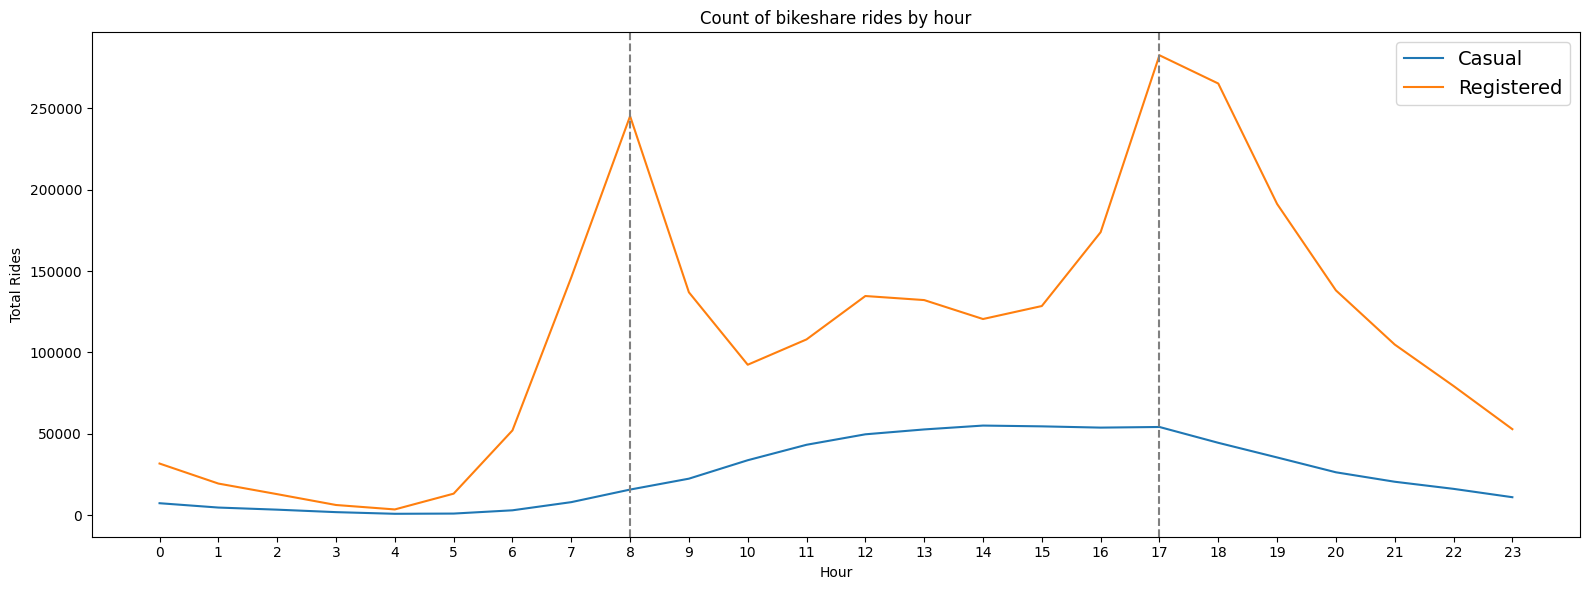

In [63]:
plt.figure(figsize=(16,6))

sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. The above chart shows very obvious different pattern on how casual and registered bikeshare rides differs based on hour in a day.
2. The registered bikeshare rides shows peak on 8.00 and 17.00. Given both these hours are time when people go to work and coming back from work, it's possible that registered bikeshare users use the bike to commute to work.
3. On the other hand, casual bikeshare rides shows higher frequency  during the day, then it starts to decrease after 17.00.

### **What season has the highest bike-sharing rides?**

In [64]:
seasonly_users_df = hourlysharing_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

casual  registered      cnt
season                             
Fall    129782      711831   841613
Spring  203522      715067   918589
Summer  226091      835038  1061129
Winter   60622      410726   471348

In [65]:
seasonly_users_df = seasonly_users_df.reset_index()

In [66]:
seasonly_users_df

season  casual  registered      cnt
0    Fall  129782      711831   841613
1  Spring  203522      715067   918589
2  Summer  226091      835038  1061129
3  Winter   60622      410726   471348

In [67]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

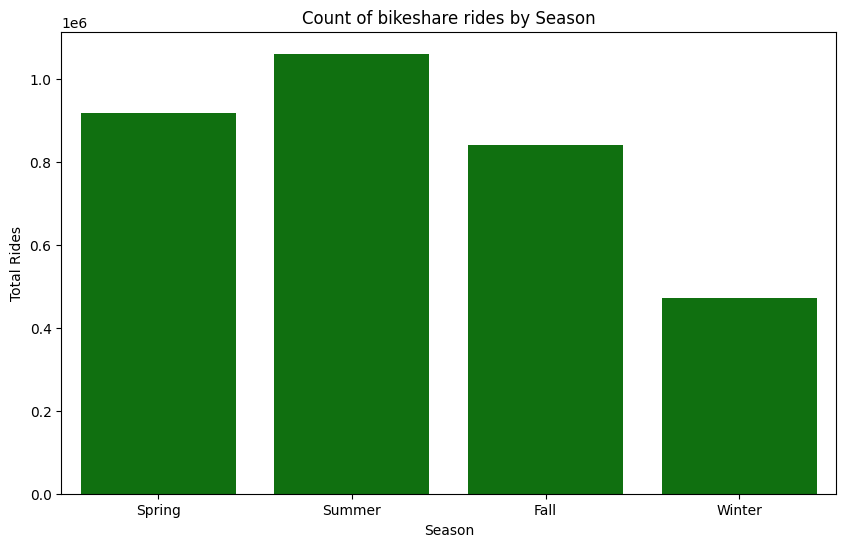

In [68]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order, color="green")

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

- The count of bikeshare users are highest during Summer season, and lowest during Winter season.
- Further, to see the difference between casual and registered bikeshare users pattern in each season, we will unpivot the `season_users_df`

In [69]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [70]:
seasonly_users_df_unpivoted

season      status   count
0    Fall      casual  129782
1  Spring      casual  203522
2  Summer      casual  226091
3  Winter      casual   60622
4    Fall  registered  711831
5  Spring  registered  715067
6  Summer  registered  835038
7  Winter  registered  410726

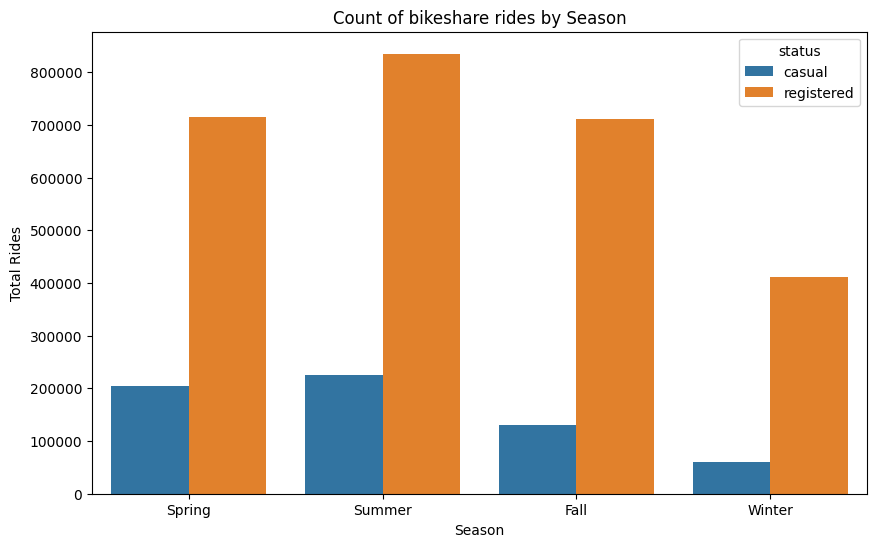

In [71]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight**
- The count of bikeshare rides are highest during Summer season, and lowest during Winter season.
- There are no major difference between casual and registered rides pattern during season, both are highest in Summer and lowest during Winter.

### **What is the usage pattern of bikesharing rides based on day of the week?**

In [72]:
weekday_users_df = hourlysharing_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

casual  registered     cnt
weekday                              
Friday      78238      409552  487790
Monday      70784      384719  455503
Saturday   153852      323955  477807
Sunday     140521      303506  444027
Thursday    61460      423935  485395
Tuesday     57843      411266  469109
Wednesday   57319      415729  473048

In [73]:
weekday_users_df = weekday_users_df.reset_index()

In [74]:
weekday_users_df

weekday  casual  registered     cnt
0     Friday   78238      409552  487790
1     Monday   70784      384719  455503
2   Saturday  153852      323955  477807
3     Sunday  140521      303506  444027
4   Thursday   61460      423935  485395
5    Tuesday   57843      411266  469109
6  Wednesday   57319      415729  473048

In [75]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

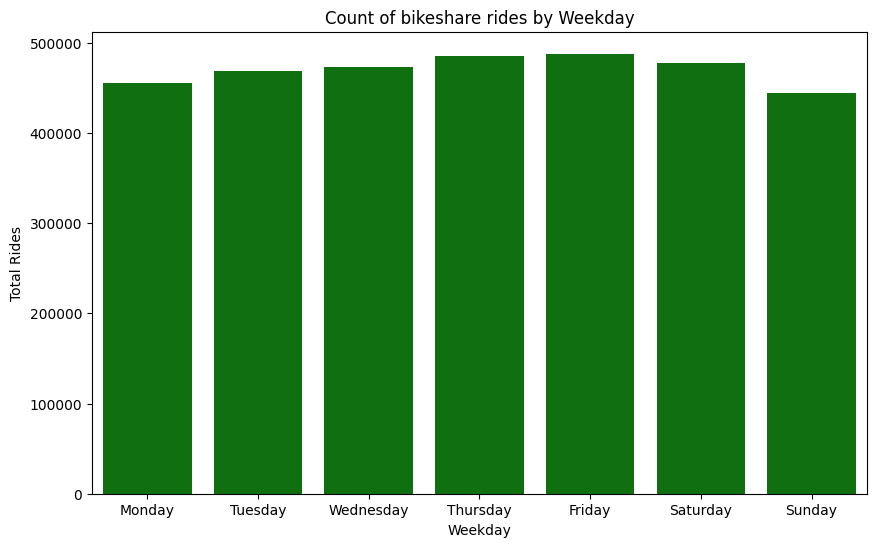

In [76]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='green')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- It seems like the count of bikeshare users are spaced quite evenly during the weekday
- Further, to see the difference between casual and registered bikeshare users pattern during weekday, we will unpivot the `weekday_users_df`

In [77]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [78]:
weekday_users_df_unpivoted

weekday      status   count
0      Friday      casual   78238
1      Monday      casual   70784
2    Saturday      casual  153852
3      Sunday      casual  140521
4    Thursday      casual   61460
5     Tuesday      casual   57843
6   Wednesday      casual   57319
7      Friday  registered  409552
8      Monday  registered  384719
9    Saturday  registered  323955
10     Sunday  registered  303506
11   Thursday  registered  423935
12    Tuesday  registered  411266
13  Wednesday  registered  415729

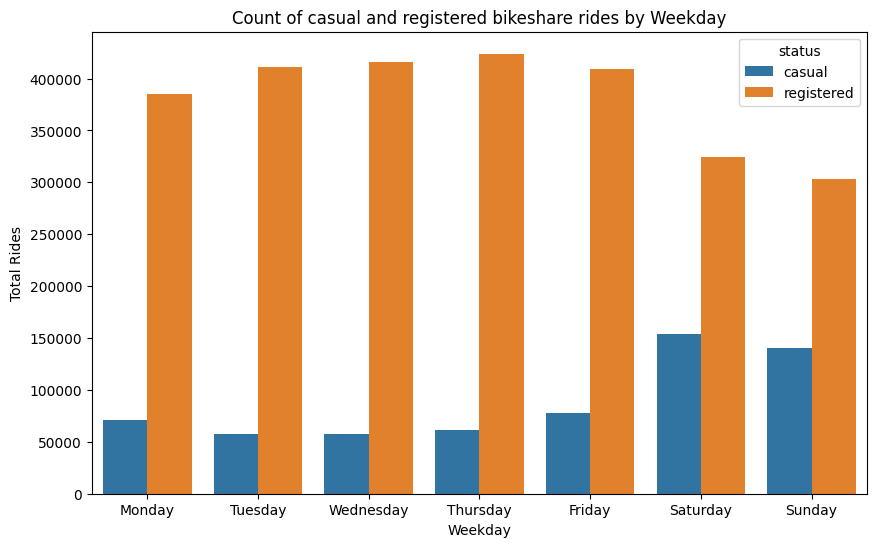

In [79]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

**Insight**
1. When we separate the count of bikeshare rides between casual and registered users, we see an interesting pattern here.
2. The count of casual rides are higher on the weekend, while for registered rides are higher on the weekday.
3. Adding to the insight we found on hourly rides, this further supports that registered users probably used the bike for work routinely during weekday, while the casual users used the bike for casual leisure on weekend.

### **Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?**

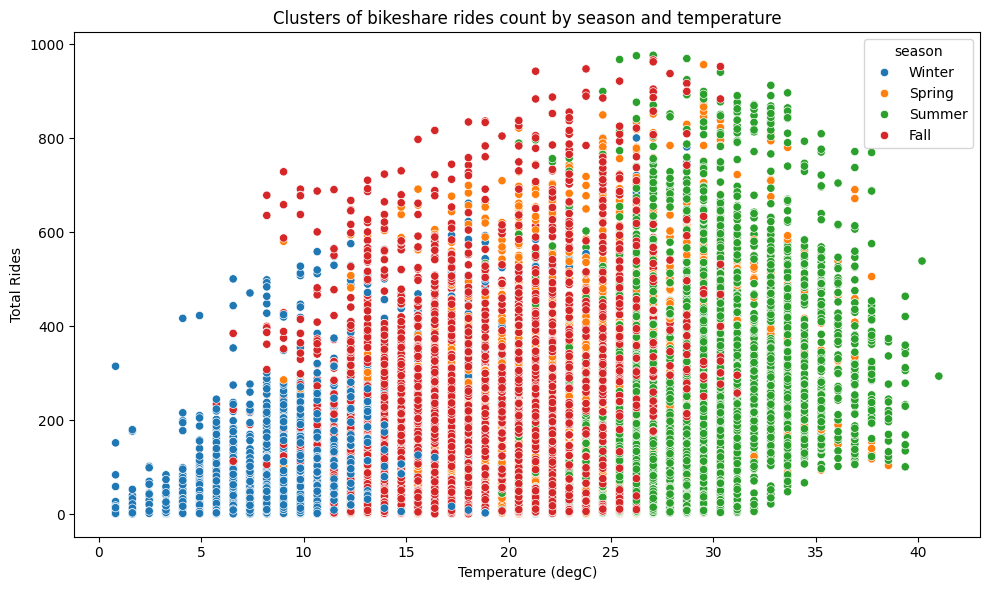

In [80]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=hourlysharing_df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

plt.tight_layout()
plt.show()

**Insight**
1. In the chart above, during the time when temperature is lower, the count of bikeshare rides are also low. This happens during winter season.
2. When temperature is high, the count of bikeshare rides also increase. This happened during summer.
3. However, there seem to be a "sweet-spot" of temperature where the count of bikeshare rides are the highest. We can see it in the Fall and Summer season cluster. The "sweet-spot" of temperature are between 20degC to 30degC.
4. During the days with those temperature conditions, we can expect the count of bikeshare rides will be high.

### **Does weather affect bikeshare usage?**

Let's recall the weather situation in `weathersit` variable:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [81]:
weatherly_users_df = hourlysharing_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_users_df

casual  registered      cnt
weathersit                             
1           462745     1875428  2338173
2           134481      661471   795952
3            22783      135548   158331
4                8         215      223

In [82]:
weatherly_users_df = weatherly_users_df.reset_index()

In [83]:
weatherly_users_df

weathersit  casual  registered      cnt
0           1  462745     1875428  2338173
1           2  134481      661471   795952
2           3   22783      135548   158331
3           4       8         215      223

<ipython-input-84-051ffd428852>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df, palette=["#3274A1", "#E1812C", "#107010"])
<ipython-input-84-051ffd428852>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df, palette=["#3274A1", "#E1812C", "#107010"])


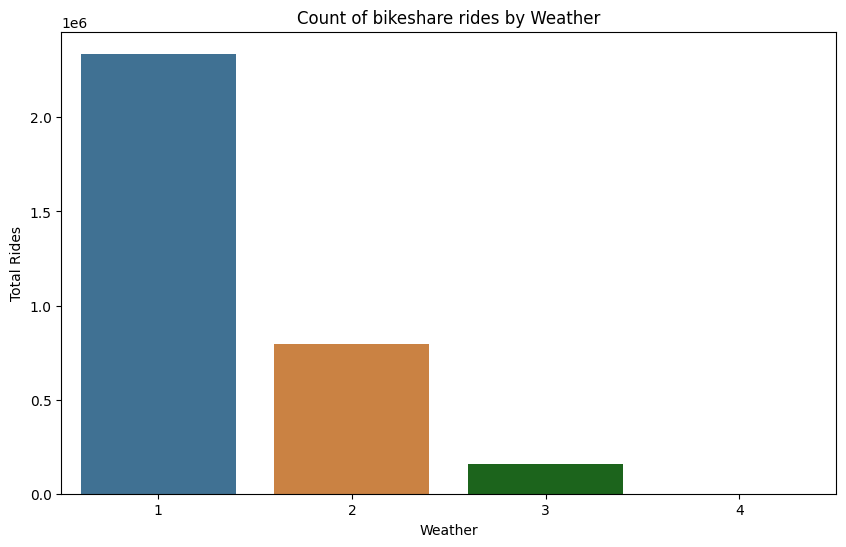

In [84]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df, palette=["#3274A1", "#E1812C", "#107010"])

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

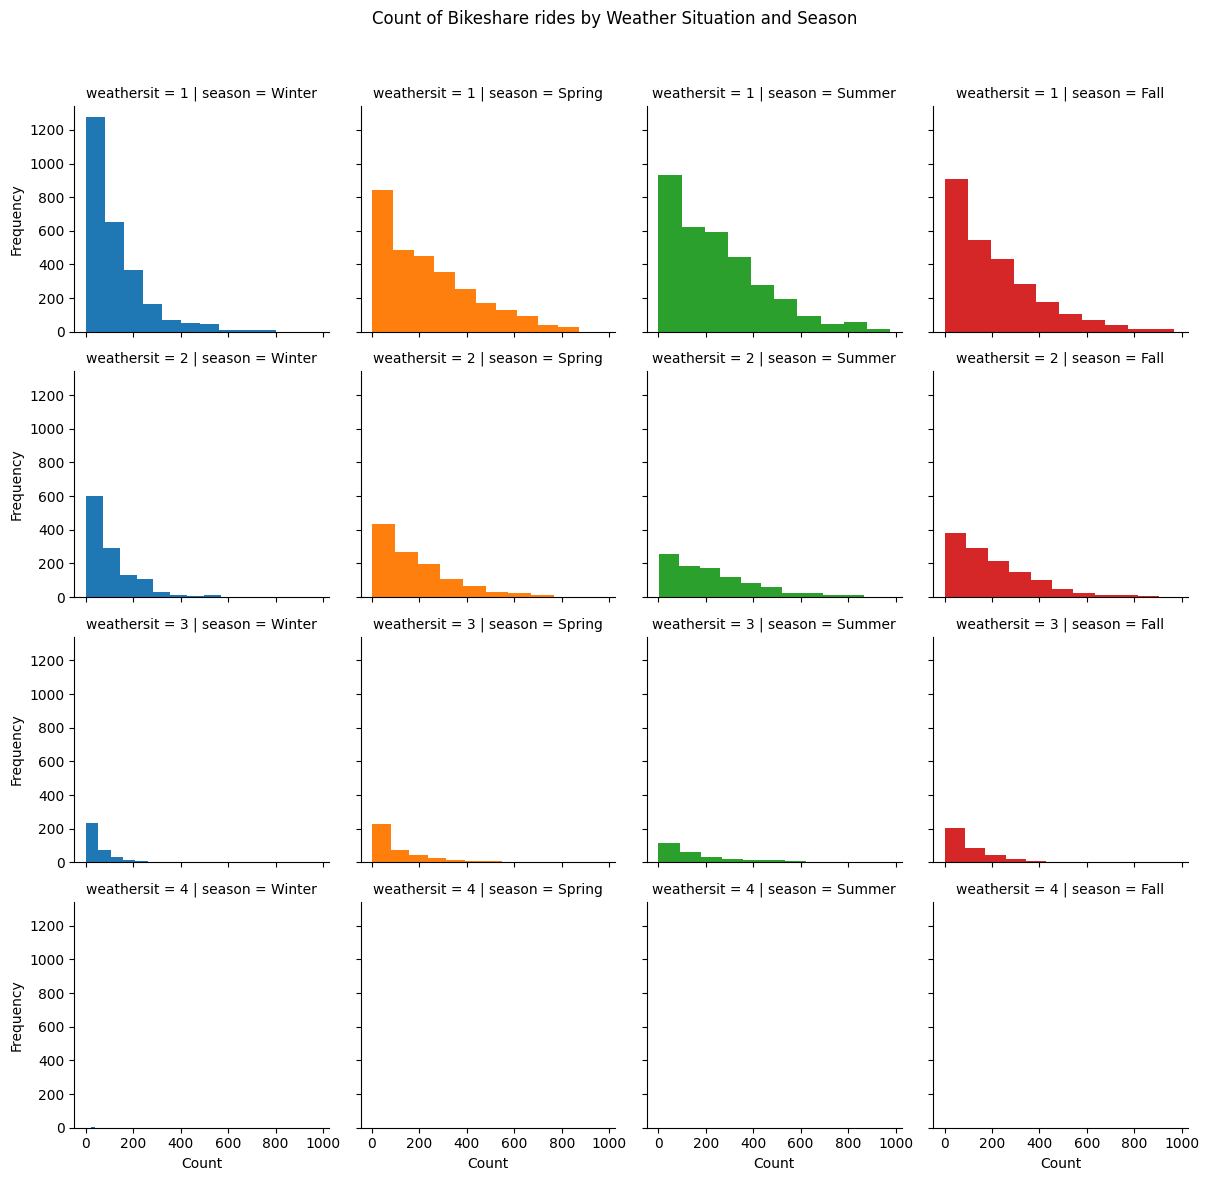

In [85]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=hourlysharing_df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Bikeshare rides by Weather Situation and Season')

g.set_xlabels('Count')
g.set_ylabels('Frequency')

plt.show()

**Insight**
1. The count of bikeshare rides usage are largely affected by weather conditions. There are significantly less rides during heavy rain and thunderstorms compared to nicer weathers.
2. This conditons hold true for all seasons.

## **Conclusion**

### **How is the trend in the number of bike-sharing rides in recent years?**

> The number of bikeshare rides in 2012 was higher than in 2011. Both years showed the same trend and seasonality, with the number of rides increasing in the middle of the year and decreasing at the beginning and end of the year.

### **What is the usage pattern of bike-sharing rides based on time of day?**

> - For registered users, the number of rides peaked at 8:00 AM and 5:00 PM, suggesting that they may have used the bikes to commute to work.
> - For casual users, the number of rides started to increase during the day and decreased during the night.

### **What season has the highest bike-sharing rides?**

> Bikeshare rides were highest during the summer season and lowest during the winter season.

### **What is the usage pattern of bike-sharing rides based on day of the week?**

> - For registered users, the number of rides was higher during weekdays. This is consistent with the findings in question 2, suggesting that registered users likely used the bikes to commute to work.
> - For casual users, the number of rides was higher on weekends than on weekdays, indicating that they used the bikes for leisure activities on weekends.

### **Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?**

> - Yes, there is a moderate correlation between temperature and the number of bikeshare rides.
> - The number of rides is lowest at colder temperatures, which occur during the winter, and starts to increase as the temperature increases, which happens in the summer. However, there is a "sweet spot" or temperature range when the number of rides is highest, which is between 20°C and 30°C. This temperature range typically occurs during the summer and fall seasons.
> - On days with these temperature conditions, we can expect the number of bikeshare rides to be high.

### **Does weather affect bikeshare usage?**

> Yes, the number of rides is significantly higher during clear weather than during more extreme weather conditions.

## **Regression Analysis**

### **Regression Analysis on Temperature**

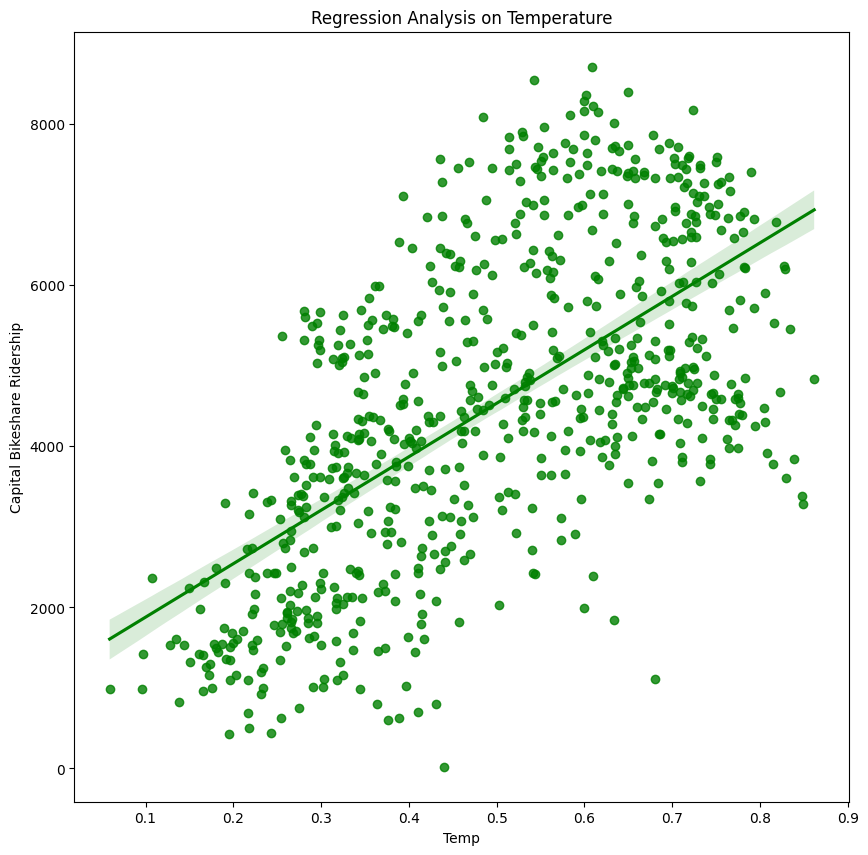

In [86]:
sns.regplot(x=dailysharing_df['temp'], y=dailysharing_df['cnt'], color='green')
plt.title('Regression Analysis on Temperature')
plt.xlabel('Temp')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Regression Analysis on Humidity**

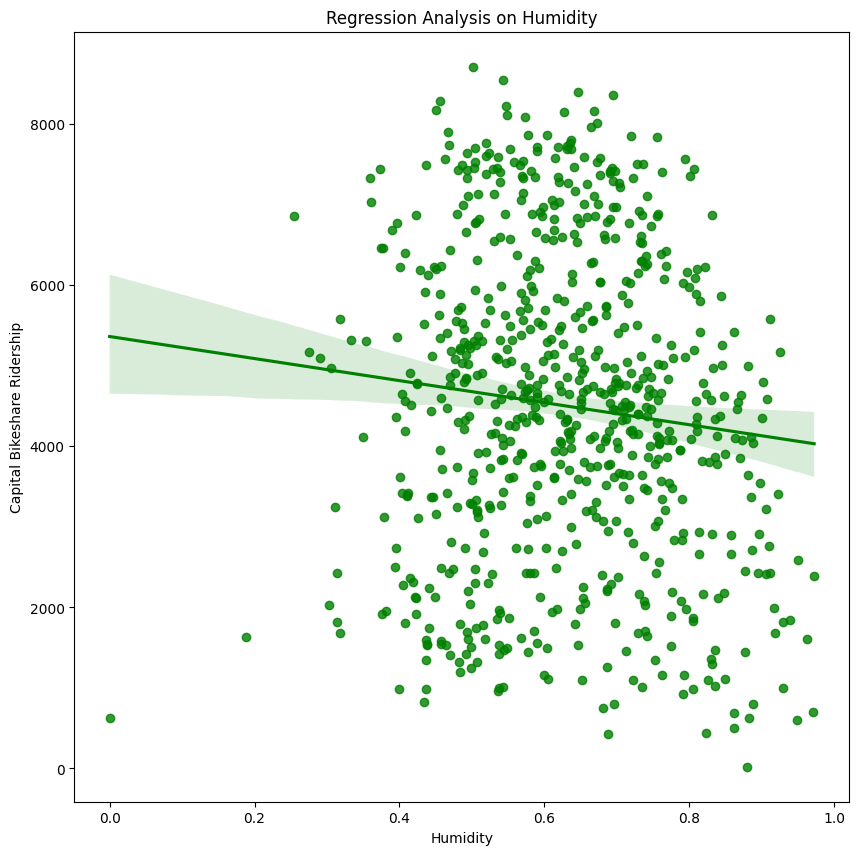

In [87]:
sns.regplot(x=dailysharing_df['hum'], y=dailysharing_df['cnt'], color = 'green')
plt.title('Regression Analysis on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Regression Analysis on Wind Speed**

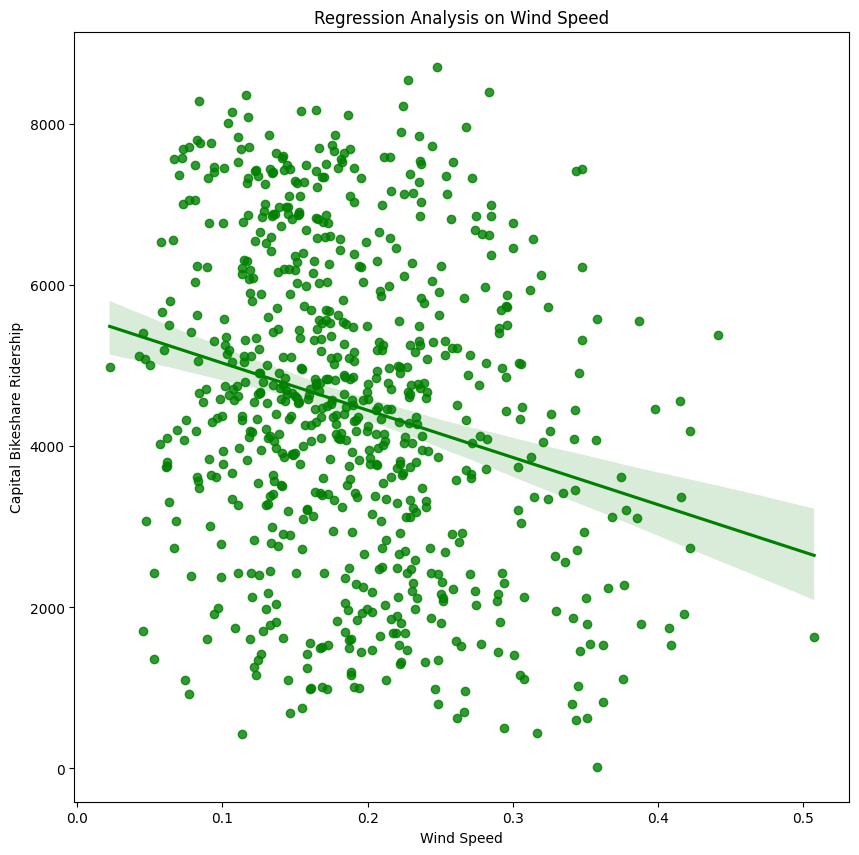

In [88]:
sns.regplot(x=dailysharing_df['windspeed'], y=dailysharing_df['cnt'], color='green')
plt.title('Regression Analysis on Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Analysis of Temperature, Humidity, and Wind Speed**

In [89]:
import plotly.express as px
fig = px.scatter_3d(
    dailysharing_df,
    x='temp',
    y='hum',
    z='windspeed',
    color='season'
)
fig.show()

## **Linear Regression**

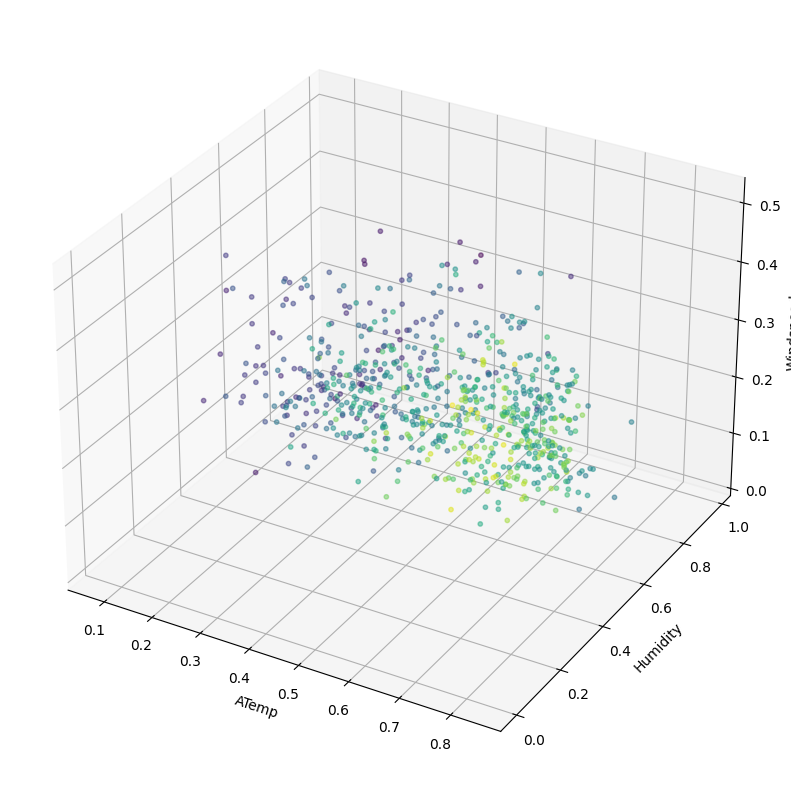

In [90]:
atemp = dailysharing_df['atemp'].values
humidity = dailysharing_df['hum'].values
windspeed = dailysharing_df['windspeed'].values
cnt = dailysharing_df['cnt'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(atemp, humidity, windspeed, c=cnt, cmap='viridis', s=10, alpha=0.5)
ax.set_xlabel('ATemp')
ax.set_ylabel('Humidity')
ax.set_zlabel('Windspeed')
plt.show()

In [91]:
m = len(atemp)
x0 = np.ones((m,1))
X = dailysharing_df[['atemp','hum','windspeed']].values
X = np.concatenate((x0 , X), axis=1)
# Koefisien Awal
theta = np.zeros((4,1))
Y = cnt.reshape(len(cnt),1)
alpha = 0.0001

In [92]:
from numpy.linalg import inv
thetas = np.matmul(np.matmul(inv(np.matmul(X.T,X)), X.T),Y)
thetas

array([[ 3773.95909515],
       [ 7504.0918613 ],
       [-3167.48479155],
       [-4411.66455727]])

These coefficients are the result of fitting a linear regression model to the data provided. They indicate the impact of each feature on the predicted output. Positive coefficients indicate a positive correlation with the target variable, while negative coefficients indicate a negative correlation. For instance:

- A higher coefficient for 'atemp' suggests that an increase in atmospheric temperature leads to a larger increase in the predicted count of whatever 'cnt' represents.
- A negative coefficient for 'hum' suggests that an increase in humidity leads to a decrease in the predicted count.
- Similarly, a negative coefficient for 'windspeed' suggests that higher wind speeds lead to a decrease in the predicted count.

In [93]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

In [94]:
inital_cost = cost_function(X, Y, theta)
print(inital_cost)

12018406.44117647


The output **12018406.44117647** represents the initial cost (or error) of the linear regression model before optimization. This value represents the average squared difference between the predicted values and the actual values, normalized by the number of training examples. A lower value indicates a better fit of the model to the training data. This initial cost serves as a baseline for evaluating the performance of the model after optimization.

In [95]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):

        h = X.dot(theta)

        loss = h - Y

        gradient = X.T.dot(loss) / m

        theta = theta - alpha * gradient

        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [96]:
newTheta, cost_history  = gradient_descent(X, Y, theta, alpha, 50000)

print(newTheta)

print(cost_history[-1])

[[2635.18529236]
 [2026.03081617]
 [1361.18942226]
 [ 350.91111067]]
1600493.3184210141


The output represents the updated coefficients (newTheta) and the final cost after running gradient descent optimization. The output indicates that after 50,000 iterations of gradient descent, the parameters of the model have been updated, resulting in a final cost of approximately 1600493.3184210141. This means that the model's predictions are now closer to the actual values compared to the initial set of coefficients, as indicated by the lower cost.

Text(0.5, 0, 'Iteration')

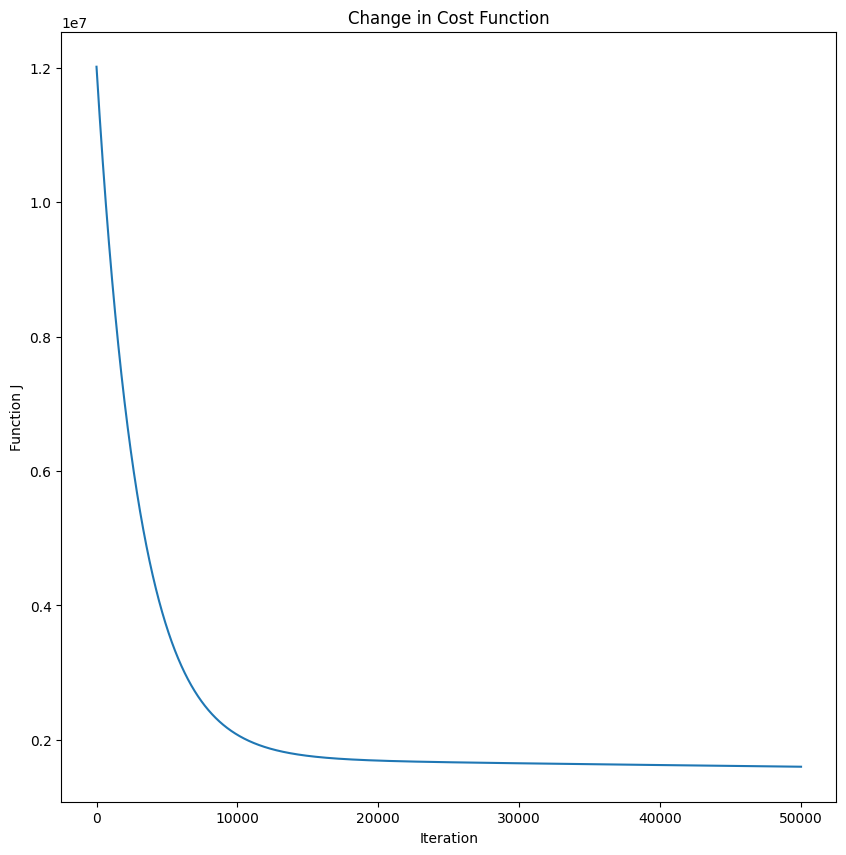

In [97]:
plt.plot(cost_history)
plt.title('Change in Cost Function')
plt.ylabel('Function J')
plt.xlabel('Iteration')

Thank you for visiting my data analysis bike share project! 🚴‍♂️💫